<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [8]:
yelp.shape

(10000, 10)

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

C:\Users\Michael\Anaconda3\envs\U4-S1-NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [25]:
# def tokenize(doc):
    
#     return ...

In [5]:
# Tokenizer function

def tokenize(text):
    tokens = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            tokens.append(token)
    return tokens

In [7]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [9]:
yelp['tokens'].head()

0    [beware, fake, fake, fake, small, business, al...
1    [came, lunch, togo, service, quick, staff, fri...
2    [vegas, dozens, times, stepped, foot, circus, ...
3    [went, night, closed, street, party, best, act...
4    [stars, price, lunch, seniors, eating, food, s...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object -- also setting max and min on df etc...
tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.95, ngram_range=(1,2))

# Learn vocab and transform data into form we want
sparse = tfidf.fit_transform(yelp['text'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,able,absolutely,actually,amazing,area,arrived,asked,atmosphere,attentive,away,...,wonderful,work,working,worst,worth,wouldn,wrong,year,years,yelp
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.130355,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154235,0.0,0.0
3,0.0,0.0,0.302932,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [11]:
dtm.shape

(10000, 275)

In [12]:
# import / Instantiate / fit NN
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [14]:
bad_review = ["""
Service was just terrible. Horrible! I couldn't eat the food. 
The slimy young hoodlum that took my order told me I had something between my teeth. 
She had tattoos on her arms and she was chewing gum. I got diarrhea the next day. 
I’ll never leave my house again.
"""]

In [15]:
# Query for simular reveiews
new = tfidf.transform(bad_review)

nn.kneighbors(new.todense())

(array([[1., 1., 1., 1., 1.]]),
 array([[ 897, 6311,  469, 3543, 4839]], dtype=int64))

In [16]:
yelp['text'][897]

'The guy asks teenage girls to take scandalous pictures for his Snapchat. Always an uncomfortable environment.'

In [17]:
yelp['text'][6311]

# translation:
"""

The weather is very hot and I can't eat anything. Today I ordered a 
Korean cold noodle soup, and after the meal, I ordered the dessert. 
The smoothie series will not be too sweet. I think the store is very 
careful, including the delicate dish, the condiment hygiene, and the 
summer. Appetizing, this is a good choice, the service staff is also 
very dedicated and will come often in the future.
"""

'天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來'

In [18]:
yelp['text'][469]

'O  o  thenk 6nnn  .b  cgv  xx TV cvg  9 nvehxcfvvv3c nb b  c  y4  nb and the vghvhridd h 0d  c       v   3,  vv  4  ruddy'

In [19]:
yelp['text'][3543]

'$25 for 2 weeks'

In [20]:
yelp['text'][4839]

# translation: 
"""
A superb selection of Québec microbrewery beers with a selection of 
cheeses and charcuteries. The staff is very friendly. The beer 
selection is constantly evolving. Congratulations to the team.
"""

"Une superbe sélection de bières de microbrasserie québécoise avec sélection de fromages et charcuteries. Le personnel est très sympathique. La sélection de bières evolue constamment. Bravo à l'équipe."

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [23]:
# Import Statements
from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import TruncatedSVD

In [25]:
# checking...
yelp['stars'].dtypes

dtype('int64')

In [26]:
# all at once: vectorizer, classifier, pipeline

vect = TfidfVectorizer()
#                        stop_words='english', max_features=1000, ngram_range=(1,2), 
#                        min_df=0.02, max_df=.70)
# rfc = RandomForestClassifier()
svd = TruncatedSVD(random_state=5)
sgd = SGDClassifier()

pipe = Pipeline([('vect', vect), ('svd', svd), ('sgd', sgd)])

In [27]:
# tune SGDClassifier ... hopefully not too much at once... XD

parameters = {
     'vect__max_df': (.4, 0.5, 0.7),
     'vect__min_df': (.01, .02, .03),
     'vect__max_features': (600, 800, 1000),
#     'clf__n_estimators':(100, 200, 300),
#     'clf__max_depth':(80, 100)
      'sgd__max_iter': (10, 20, 50),
      'svd__n_components' : (50, 100, 200),
      'svd__n_iter' : (2, 5, 10, 20)
}

sgd_search = RandomizedSearchCV(pipe, parameters, n_jobs=4, verbose=1)
# grid_search.fit(data.data, data.target)
sgd_search.fit(yelp['text'], yelp['stars'])

C:\Users\Michael\Anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   39.2s finished
C:\Users\Michael\Anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'vect__max_df': (0.4, 0.5, 0.7), 'vect__min_df': (0.01, 0.02, 0.03), 'vect__max_features': (600, 800, 1000), 'sgd__max_iter': (10, 20, 50), 'svd__n_components': (50, 100, 200), 'svd__n_iter': (2, 5, 10, 20)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [28]:
sgd_search.best_score_

# LMFAO!

0.6112

In [29]:
sgd_search.best_params_

#  .okay.  .sure.

{'vect__min_df': 0.01,
 'vect__max_features': 1000,
 'vect__max_df': 0.7,
 'svd__n_iter': 5,
 'svd__n_components': 200,
 'sgd__max_iter': 20}

In [30]:
pred = sgd_search.predict(bad_review)

In [31]:
print(pred)

# Yes!!!

[1]


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [32]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [35]:
# just calling the tokens column instead of that stream from the engine etc...

id2word = corpora.Dictionary(yelp['tokens'])

In [36]:
# CHecking to see if it worked...
id2word.token2id['shoe']

4271

In [ ]:
# cool

Create a bag of words representation of the entire corpus

In [37]:
# Need a "Bag of Words"

corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [38]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

In [39]:
# Oooooo "topics"
lda.print_topics()

[(0,
  '0.013*"food" + 0.012*"great" + 0.011*"good" + 0.011*"place" + 0.008*"service" + 0.007*"like" + 0.007*"time" + 0.004*"chicken" + 0.004*"nice" + 0.004*"amazing"'),
 (1,
  '0.010*"food" + 0.009*"place" + 0.008*"time" + 0.008*"great" + 0.007*"service" + 0.007*"good" + 0.006*"like" + 0.005*"staff" + 0.004*"chicken" + 0.004*"friendly"'),
 (2,
  '0.014*"food" + 0.013*"great" + 0.012*"good" + 0.011*"place" + 0.009*"time" + 0.008*"like" + 0.008*"service" + 0.005*"nice" + 0.004*"order" + 0.004*"chicken"'),
 (3,
  '0.013*"good" + 0.011*"food" + 0.011*"great" + 0.011*"place" + 0.010*"like" + 0.009*"service" + 0.009*"time" + 0.004*"nice" + 0.004*"best" + 0.004*"experience"'),
 (4,
  '0.012*"food" + 0.011*"great" + 0.011*"place" + 0.010*"service" + 0.009*"good" + 0.007*"like" + 0.006*"time" + 0.005*"nice" + 0.005*"best" + 0.004*"come"'),
 (5,
  '0.013*"food" + 0.010*"like" + 0.008*"service" + 0.008*"place" + 0.008*"great" + 0.007*"good" + 0.006*"time" + 0.005*"came" + 0.004*"best" + 0.004*"w

In [40]:
# RegEx away all the extra silliness from the above output

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:5]) for t in words]


# Pretty print-job of topics without all the silly extra stuff
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
food great good place service

------ Topic 1 ------
food place time great service

------ Topic 2 ------
food great good place time

------ Topic 3 ------
good food great place like

------ Topic 4 ------
food great place service good

------ Topic 5 ------
food like service place great

------ Topic 6 ------
place good time service great

------ Topic 7 ------
place food good great like

------ Topic 8 ------
good time place food service

------ Topic 9 ------
good food place service great



In [ ]:
# hmmm.... looks like there is probably a lot of overlap...

Create 1-2 visualizations of the results

In [41]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

C:\Users\Michael\Anaconda3\envs\U4-S1-NLP\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [42]:
# This is going to become our visualizer ... eventually...
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\Michael\Anaconda3\envs\U4-S1-NLP\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.003320  0.000914       1        1  11.130380
2     -0.004126 -0.001051       2        1  10.813838
6      0.002117  0.006475       3        1  10.445580
4     -0.002805  0.000639       4        1  10.347219
8      0.001031  0.001710       5        1  10.041167
0     -0.001431 -0.000036       6        1   9.924852
5      0.000431 -0.002377       7        1   9.519442
7     -0.000164 -0.002314       8        1   9.393469
9      0.004841 -0.000586       9        1   9.361945
1      0.003426 -0.003374      10        1   9.022102, topic_info=     Category         Freq        Term        Total  loglift  logprob
130   Default  4745.000000        food  4745.000000  30.0000  30.0000
191   Default  4121.000000       great  4121.000000  29.0000  29.0000
43    Default  1502.000000       staff  1502.000000  28.0000  28.0000
16    Default  3321.000000        like  3321.000000  27.0000  27.0000
31    Default  3298.000000        time  3298.000000  26.0000  26.0000
37    Default  4453.000000        good  4453.000000  25.0000  25.0000
34    Default  1436.000000        came  1436.000000  24.0000  24.0000
122   Default  4555.000000       place  4555.000000  23.0000  23.0000
327   Default  1193.000000   delicious  1193.000000  22.0000  22.0000
176   Default  1310.000000     amazing  1310.000000  21.0000  21.0000
241   Default  1248.000000  experience  1248.000000  20.0000  20.0000
920   Default   675.000000     looking   675.000000  19.0000  19.0000
36    Default  1334.000000    friendly  1334.000000  18.0000  18.0000
149   Default   842.000000       think   842.000000  17.0000  17.0000
434   Default  1172.000000        know  1172.000000  16.0000  16.0000
1174  Default  1341.000000     chicken  1341.000000  15.0000  15.0000
482   Default   906.000000        work   906.000000  14.0000  14.0000
85    Default   938.000000       night   938.000000  13.0000  13.0000
141   Default   872.000000       price   872.000000  12.0000  12.0000
22    Default   877.000000     minutes   877.000000  11.0000  11.0000
98    Default   919.000000        sure   919.000000  10.0000  10.0000
473   Default   928.000000        told   928.000000   9.0000   9.0000
83    Default  1685.000000        nice  1685.000000   8.0000   8.0000
589   Default  1329.000000  restaurant  1329.000000   7.0000   7.0000
667   Default  1587.000000        love  1587.000000   6.0000   6.0000
101   Default   824.000000       times   824.000000   5.0000   5.0000
27    Default  1159.000000        said  1159.000000   4.0000   4.0000
219   Default   610.000000        away   610.000000   3.0000   3.0000
120   Default  1381.000000      people  1381.000000   2.0000   2.0000
320   Default  1399.000000        come  1399.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
902   Topic10    51.489624    sandwich   405.607880   0.3415  -6.6378
225   Topic10   117.193176       right  1053.604004   0.2093  -5.8154
141   Topic10    99.111748       price   872.029724   0.2309  -5.9830
401   Topic10    90.387695    customer   797.485962   0.2281  -6.0751
1185  Topic10    45.493233        pork   355.915649   0.3484  -6.7617
1304  Topic10    55.644207   breakfast   451.792816   0.3112  -6.5602
190   Topic10   118.379692       going  1105.624390   0.1712  -5.8053
85    Topic10   102.290710       night   938.822144   0.1887  -5.9514
663   Topic10    85.148796        home   772.450623   0.2003  -6.1348
130   Topic10   384.154144        food  4745.072754  -0.1083  -4.6282
122   Topic10   358.470642       place  4555.394531  -0.1367  -4.6974
176   Topic10   130.148804     amazing  1310.951538   0.0957  -5.7105
318   Topic10    86.880089      cheese   794.781555   0.1920  -6.1147
504   Topic10    74.168747       super   654.410645   0.2281  -6.2729
191   Topic10   306.479950       great  4121.735840  -0.1934  -4.8541
327   Topic10   117

In [ ]:
# Yep. Lots of overlap. k. whatev.

In [46]:
# stream = doc_stream(path) ... but so far that's been = to df['tokens']... so
stream = yelp['tokens']

In [47]:
from gensim.models.coherencemodel import CoherenceModel

In [48]:
def compute_coherence_values(dictionary, corpus, stream, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    stream: replaces --> path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(stream)
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = stream
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [ ]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        start=2, 
                                                        limit=20,
                                                        stream=stream,
                                                        step=3,
                                                        passes=10)

In [50]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [51]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-1.807317,2,0
1,-1.875837,5,0
2,-1.933182,8,0
3,-1.892797,11,0
4,-1.926338,14,0


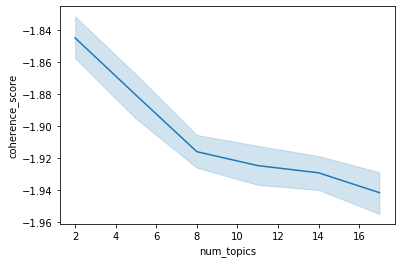

In [53]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence);

In [ ]:
#:O

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)